In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,...,26.020,23.99,180.90,2073.0,0.1696,0.4244,0.58030,0.22480,0.3222,0.08009
199,877500,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.059800,...,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
419,906290,B,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,...,12.360,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
412,905539,B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,...,9.965,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206
371,9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,...,16.200,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


**Classification**

Ko'krak saratonini aniqlash


In [8]:
#diagnosis ustunini tahlil qilamiz va o'zgartiramiz
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

M -> Kasallar

B -> Sog'lom

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'].values)

df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

0 -> Sog'lomlar

1 -> Kasallar

**Korrelatsiya**


In [4]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,0.052511,0.143048,0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.012968,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [10]:
# ba'zi ustunlarni olib tashlaymiz (id)

df.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'id'], axis=1, inplace=True)

corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.567134,0.556141,0.548236,0.408042,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,0.674172,0.735864,0.376169,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,0.281673,0.259845,0.163851,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,0.693135,0.744983,0.407217,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,0.726628,0.800086,0.372320,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,0.296092,0.246552,0.380676,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.497473,0.548905,0.455653,0.642262,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.631925,0.660391,0.617427,0.683260,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.698050,0.710650,0.690299,0.615634,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.303379,0.313893,0.223970,0.393298,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# **diagnosis ustuninign qolgan ustunlar bilan korelatsiyasi(bog'liqligi)**

In [11]:
df.corrwith(df['diagnosis'].abs().sort_values(ascending=False))

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
concave points_se          0.408042
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
dtype: float64

In [15]:
# Ma'lumotlarni x va y ga ajratib chiqamiz
from sklearn.preprocessing import StandardScaler
standart = StandardScaler()

x = df.drop('diagnosis', axis=1)
x = standart.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
y = df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # k ning qiymati

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_predict = knn.predict(x_test)

# Baholash

In [20]:
#Jaccard

from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8823529411764706

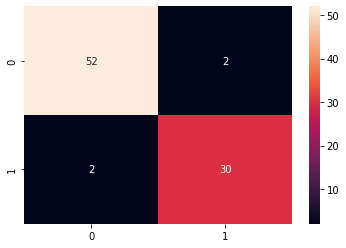

In [23]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True) #annot=True ichidagi raqamlarni chiqarish uchun
plt.show()

In [24]:
confusion_matrix(y_test, y_predict)

array([[52,  2],
       [ 2, 30]])

**precision, recall, F1**

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

0.9375
0.9375
0.9375
0.9534883720930233


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.94      0.94      0.94        32

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86



**Cross validation yordamida**



In [33]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(estimator=knn, X = x, y = y, cv=5)

from sklearn.metrics import classification_report
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       357
           1       0.97      0.95      0.96       212

    accuracy                           0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569

